# Data Wrangling Project

# Imports

In [2]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests
import json
import seaborn as sns

### Downloading data from twitter API

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)




In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## 1. Gathering the Data

In [701]:
os.listdir()

['twitter-archive-enhanced.csv',
 'wrangle_act.pdf',
 'twitter_archive_master.csv',
 'act_report.pdf',
 'tweet-json.txt',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_act.html',
 'twitter_main_df.csv',
 'wrangle_act.ipynb']

In [702]:
# loading the data from the csv file
twitter_df = pd.read_csv(r'twitter-archive-enhanced.csv', sep="," )
twitter_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [703]:
# downloading a file from the url
url_file = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url_file)
filename = url_file.split('/')[-1]
file_path = os.path.join(os.getcwd(), filename)
with open(file_path, mode = 'wb') as file:
    file.write(response.content)

In [704]:
doggo_pred_df = pd.read_csv(filename, sep='\t')

In [705]:
doggo_pred_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [706]:
# reading queried tweets

twitter_api_df = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

#  read this tweet_json.txt file line by line
with open(r'tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        twitter_api_df = twitter_api_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
twitter_api_df = twitter_api_df.reset_index(drop = True)
twitter_api_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## 2. Assesing the data

### twitter_df - visual and programmatic assessment

In [707]:
twitter_df.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
630,794332329137291264,NaN,NaN,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,None,None
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1545,689289219123089408,NaN,NaN,2016-01-19 03:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone sent me this without any context and e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689289219...,13,10,None,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,None,None,None,None,None
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None


In [708]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [709]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [710]:
twitter_df.duplicated(subset=['expanded_urls']).sum()

137

### doggo_pred_df - visual and programmatic assessment

In [711]:
doggo_pred_df.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,0.131753,False,wreck,0.095597,False
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True


In [712]:
doggo_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [713]:
doggo_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [714]:
doggo_pred_df.jpg_url.duplicated().sum()

66

In [715]:
doggo_pred_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

### twitter_api_df - visual and programmatic assessment


In [716]:
twitter_api_df.sample(100)

,tweet_id,retweet_count,favorite_count
146,863432100342583297,5664,24829
598,798682547630837760,5515,0
1520,690649993829576704,325,1435
772,776249906839351296,10673,0
1767,678380236862578688,1020,2655
1159,723912936180330496,1374,4236
2154,669597912108789760,163,550
1127,729463711119904772,2586,6340
860,762699858130116608,4190,13518
1659,683030066213818368,832,2370


In [717]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [718]:
twitter_api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,679475951516934144,3652,0
freq,1,5,179


## 3. Cleaning the data

### DEfining things to clean and correct:
*  the following columns: timestamp, retweeted_status_timestamp data types should be datatime instead of object type.
* the following columns  	in_reply_to_status_id and in_reply_to_user_id should be defined as integers, not as floats
* the rating_denominator column should be always 10. For some rows this value is different than 10.
* the name column has missing values, some names are not correct
* we have to remove unnecessary columns.'in_reply_to_status_id', 'in_reply_to_user_id'
* 

### Quality issues


<b>twitter_df dataframe - things to correct</b>:

<b>Quality Issues</b>
*  the following columns: timestamp, retweeted_status_timestamp data types should be datatime instead of object type.
* the following columns  	in_reply_to_status_id and in_reply_to_user_id should be defined as integers, not as floats
* the rating_denominator column should be always 10. For some rows this value is different than 10.
* the name column has missing values, some names are not correct
* Changing dogs breeds names to lower letters in the doggo_pred_df dataframe
* Changing the tweet_id column datatype to integer for all dataframes in order to perform a successful merge
* Extracting the gender of a dog out of a tweet
* we have to remove unnecessary columns: 'in_reply_to_status_id', 'in_reply_to_user_id'
* Dropping duplicated urls in the twitter_df_clean dateframe
* Dropping duplicated jpg urls in the doggo_pred_df dateframe
<br><br>
<b>Tidiness Issues</b>
* combining 3 dataframes to create one master/main dataframe
* merging four dog_stages columns into a single one

In [719]:
# copying dataframes to clean them
twitter_df_clean = twitter_df.copy()
doggo_pred_df_clean = doggo_pred_df.copy()
twitter_api_df_clean = twitter_api_df.copy()

### 1. Removing unnecessary columns


In [720]:
twitter_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

<b>Test</b>

In [721]:
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 2. Changing timestamp to datetime

In [722]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])
twitter_df_clean['date'] = twitter_df_clean['timestamp'].apply(lambda time: time.strftime('%m-%Y'))
twitter_df_clean['time'] = twitter_df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))
twitter_df_clean['date'] = pd.to_datetime(twitter_df_clean['date'])
twitter_df_clean['time'] = pd.to_datetime(twitter_df_clean['time'])

<b>Test</b>

In [723]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null datetime64[ns]
time                          2356 non-null datetime64[ns]
dtypes

### 3. Dropping duplicated urls in the twitter_df_clean dateframe

In [724]:
twitter_df_clean = twitter_df_clean.drop_duplicates(subset='expanded_urls', keep='first')

<b>Test</b>

In [725]:
twitter_df_clean.expanded_urls.duplicated().sum()

0

### 4. Dropping duplicated jpg urls in the doggo_pred_df dateframe

In [726]:
doggo_pred_df = doggo_pred_df.drop_duplicates(subset='jpg_url', keep='first')

<b>Test</b>

In [727]:
doggo_pred_df.jpg_url.duplicated().sum()

0

### 5. Changing dogs breeds names to lower letters in the doggo_pred_df dataframe

In [728]:
columns_breed_names =  ["p1", "p2", "p3"]
for column in columns_breed_names:
    doggo_pred_df[column].replace('-', '_', inplace=True, regex=True)
    doggo_pred_df[column].replace(' ', '_', inplace=True, regex=True)  
    doggo_pred_df[column] = doggo_pred_df [column].str.lower()

<b>Test</b>

In [729]:
doggo_pred_df.p1.value_counts()

golden_retriever             139
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           55
chow                          41
samoyed                       40
toy_poodle                    38
pomeranian                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
web_site                      19
staffordshire_bullterrier     19
shetland_sheepdog             18
maltese_dog                   18
eskimo_dog                    18
teddy                         18
beagle                        17
rottweiler                    17
shih_tzu                      17
cardigan                      17
italian_greyhound             16
kuvasz                        16
lakeland_terrier              16
          

### 6. Summerizing the prediction of doggo_pred_df dataframe into 1 column

In [730]:
# Define function to summarize the dog prediction
def choose_the_best_prediction(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

doggo_pred_df['best_breed_prediction'] = doggo_pred_df.apply(choose_the_best_prediction, axis = 1)



<b>Test</b>

In [731]:
doggo_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_breed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher


### 7.Changing the column name in the twitter_api_df_clean dateframe in order to do successful merging of 3 dataframes 

In [732]:
# using rename function changing column name from id to tweet_id
twitter_api_df_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

<b>Test</b>

In [733]:
twitter_api_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### 8.Changing the tweet_id column datatype to integer for all dataframes in order to perform a successful merge

In [734]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')
doggo_pred_df_clean['tweet_id'] = doggo_pred_df_clean['tweet_id'].astype('str')
twitter_api_df_clean['tweet_id'] = twitter_api_df_clean['tweet_id'].astype('str')

<b>Test</b>

In [735]:
print(type(twitter_df_clean['tweet_id'].iloc[0]))
print(type(doggo_pred_df_clean['tweet_id'].iloc[0]))
print(type(twitter_api_df_clean['tweet_id'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


### 9.Converting 4 columns of dog life stages into one column 

In [736]:


columns_to_correct = ['doggo', 'floofer', 'pupper', 'puppo']

for dog_type in columns_to_correct:
    twitter_df_clean.loc[twitter_df_clean[dog_type] == 'None', dog_type] = None



In [737]:
twitter_df_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [738]:
columns_to_correct = ['doggo', 'floofer', 'pupper', 'puppo']

for dog_type in columns_to_correct:
    twitter_df_clean[dog_type] = twitter_df_clean[dog_type].astype('category')

In [739]:
twitter_df_clean.dtypes

tweet_id                              object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                               category
floofer                             category
pupper                              category
puppo                               category
date                          datetime64[ns]
time                          datetime64[ns]
dtype: object

In [740]:
twitter_df_clean['dog_stage'] = twitter_df_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand=True)
twitter_df_clean['dog_stage'] = twitter_df_clean['dog_stage'].astype('category')
twitter_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [741]:
twitter_df_clean.dog_stage.value_counts()

pupper     252
doggo       85
puppo       31
floofer      4
Name: dog_stage, dtype: int64

<b>Test</b>

In [742]:
twitter_df_clean.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
1900,674664755118911488,2015-12-09 18:59:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,2015-12-01,2021-03-27 18:59:00,pupper
2237,668142349051129856,2015-11-21 19:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,2015-11-01,2021-03-27 19:02:00,NaN
754,778764940568104960,2016-09-22 01:16:45,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13,10,None,2016-09-01,2021-03-27 01:16:00,NaN
2101,670691627984359425,2015-11-28 19:51:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,2015-11-01,2021-03-27 19:51:00,NaN
1665,682750546109968385,2016-01-01 02:29:49,"<a href=""http://twitter.com/download/iphone"" r...",Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,2016-01-01,2021-03-27 02:29:00,NaN
1435,697259378236399616,2016-02-10 03:22:44,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,2016-02-01,2021-03-27 03:22:00,NaN
1277,709042156699303936,2016-03-13 15:43:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,2016-03-01,2021-03-27 15:43:00,NaN
1928,674045139690631169,2015-12-08 01:57:39,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674045139...,3,10,None,2015-12-01,2021-03-27 01:57:00,pupper
760,778383385161035776,2016-09-21 00:00:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,2016-09-01,2021-03-27 00:00:00,NaN
1073,739932936087216128,2016-06-06 21:32:13,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,2016-06-01,2021-03-27 21:32:00,NaN


### 10. Extracting the gender of a dog out of a tweet

In [743]:
male_pronouns = ["he's",'He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['hers','She', 'she', 'her', 'herself', "she's"]

gender = []



In [744]:
for text in twitter_df_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
twitter_df_clean['dog_gender'] = gender

<b>Test</b>

In [745]:
twitter_df_clean['dog_gender'].value_counts()

NaN       1293
male       677
female     249
Name: dog_gender, dtype: int64

### 11. Only rows with denominator of 10 will be taken into consideration

In [746]:
twitter_df_clean.rating_denominator.value_counts()

10     2201
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [747]:
twitter_df_clean = twitter_df_clean[twitter_df_clean.rating_denominator == 10]

<b>Test</b>

In [748]:
twitter_df_clean.rating_denominator.value_counts()

10    2201
Name: rating_denominator, dtype: int64

In [749]:
# the column rating_denominator can be dropped as all its values are equal to 10
twitter_df_clean.drop('rating_denominator', 1, inplace=True)

### 12. Values above 15 in the rating_numerator column  will be removed as they are not pragramitically siginificant

In [750]:
twitter_df_clean.rating_numerator.value_counts()

12      520
10      446
11      440
13      324
9       153
8        98
7        51
14       47
5        35
6        32
3        19
4        15
2         9
1         4
0         2
75        1
26        1
420       1
27        1
15        1
1776      1
Name: rating_numerator, dtype: int64

In [751]:
twitter_df_clean = twitter_df_clean[(twitter_df_clean.rating_numerator > 0) & (twitter_df_clean.rating_numerator < 15)]

<b>Test</b>

In [752]:
twitter_df_clean.rating_numerator.value_counts()

12    520
10    446
11    440
13    324
9     153
8      98
7      51
14     47
5      35
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

In [753]:
# 

### 13. converting columns to integer data type of twitter_api_df

In [754]:
print(type(twitter_df_clean['tweet_id'].iloc[0]))
print(type(doggo_pred_df_clean['tweet_id'].iloc[0]))
print(type(twitter_api_df_clean['tweet_id'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [755]:
twitter_api_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [756]:
twitter_api_df_clean['retweet_count'] = twitter_api_df_clean['retweet_count'].astype(int)
twitter_api_df_clean['favorite_count'] = twitter_api_df_clean['favorite_count'].astype(int)


### Merging 3 dataframes: twitter_df_clean, doggo_pred_df_clean and twitter_api_df_clean into main_df datagrame

In [757]:
print(twitter_df_clean['tweet_id'].dtype)
print(doggo_pred_df_clean['tweet_id'].dtype)
print(twitter_api_df_clean['tweet_id'].dtype)

object
object
object


In [758]:
doggo_pred_df_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [759]:
main_df = pd.merge(left=twitter_df_clean,right=twitter_api_df_clean,
                   left_on='tweet_id', right_on='tweet_id', how='inner')
main_df = pd.merge(main_df, doggo_pred_df_clean, on = 'tweet_id', how = 'inner' )

<b>Test</b>

In [760]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
name                          1971 non-null object
date                          1971 non-null datetime64[ns]
time                          1971 non-null datetime64[ns]
dog_stage                     310 non-null category
dog_gender                    1971 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
img_num 

### Removing retweets

In [761]:
main_df = main_df[np.isnan(main_df.retweeted_status_id)]

<b>Test</b>

In [762]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1893 non-null object
timestamp                     1893 non-null datetime64[ns]
source                        1893 non-null object
text                          1893 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1893 non-null object
rating_numerator              1893 non-null int64
name                          1893 non-null object
date                          1893 non-null datetime64[ns]
time                          1893 non-null datetime64[ns]
dog_stage                     299 non-null category
dog_gender                    1893 non-null object
retweet_count                 1893 non-null int64
favorite_count                1893 non-null int64
jpg_url                       1893 non-null object
img_num    

### Saving data

In [763]:
main_df.to_csv('twitter_archive_master.csv')

# Analyzing and visualizing data

In [764]:
main_df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [765]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1893 non-null object
timestamp                     1893 non-null datetime64[ns]
source                        1893 non-null object
text                          1893 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1893 non-null object
rating_numerator              1893 non-null int64
name                          1893 non-null object
date                          1893 non-null datetime64[ns]
time                          1893 non-null datetime64[ns]
dog_stage                     299 non-null category
dog_gender                    1893 non-null object
retweet_count                 1893 non-null int64
favorite_count                1893 non-null int64
jpg_url                       1893 non-null object
img_num    

In [766]:
main_df.shape

(1893, 27)

In [767]:
main_df.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,0.0,0.0,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1.893000e+03
mean,NaN,NaN,10.527205,2548.305335,8366.690967,1.200211,0.591869,0.134793,6.059475e-02
std,NaN,NaN,2.164954,4326.177177,11642.209693,0.556111,0.272423,0.100233,5.093658e-02
min,NaN,NaN,1.000000,16.000000,81.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,NaN,NaN,10.000000,609.000000,1845.000000,1.000000,0.359586,0.054322,1.648340e-02
50%,NaN,NaN,11.000000,1287.000000,3891.000000,1.000000,0.587507,0.119243,4.981050e-02
75%,NaN,NaN,12.000000,2954.000000,10471.000000,1.000000,0.841597,0.194897,9.193000e-02
max,NaN,NaN,14.000000,79515.000000,132810.000000,4.000000,0.999984,0.488014,2.710420e-01


<b>Comments: </b> most of describtive statistics of the main_df dataframe is useless. 

In [768]:
main_df.groupby('dog_stage')['favorite_count'].agg('describe').T

dog_stage,doggo,floofer,pupper,puppo
count,66.000000,3.000000,205.000000,25.000000
mean,16218.575758,22929.000000,6343.507317,24004.440000
std,18217.752960,10444.616652,8279.418894,26747.072013
min,2593.000000,12456.000000,344.000000,3277.000000
25%,7928.250000,17721.000000,2243.000000,8157.000000
50%,11512.500000,22986.000000,3148.000000,16755.000000
75%,16995.750000,28165.500000,6397.000000,28490.000000
max,131075.000000,33345.000000,51522.000000,132810.000000


### Visualisation 1

In [769]:
%matplotlib inline

sns.set(rc={'figure.figsize':(11,15)}, font_scale=1.5, style='whitegrid')

In [770]:
main_df.dog_stage.value_counts().dtype

dtype('int64')

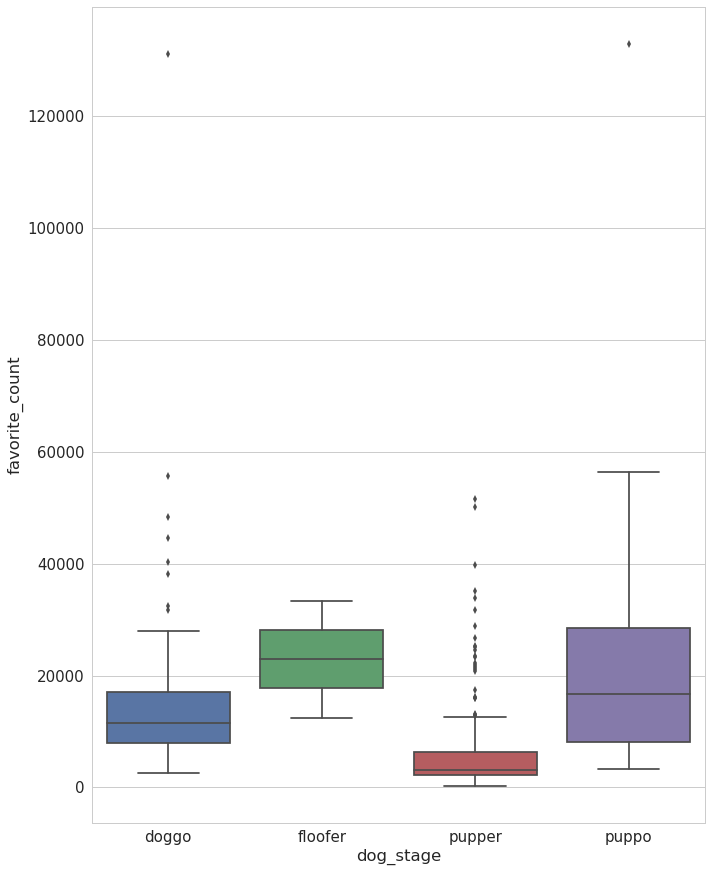

In [771]:
sns.boxplot(data=main_df, x='dog_stage', y='favorite_count')


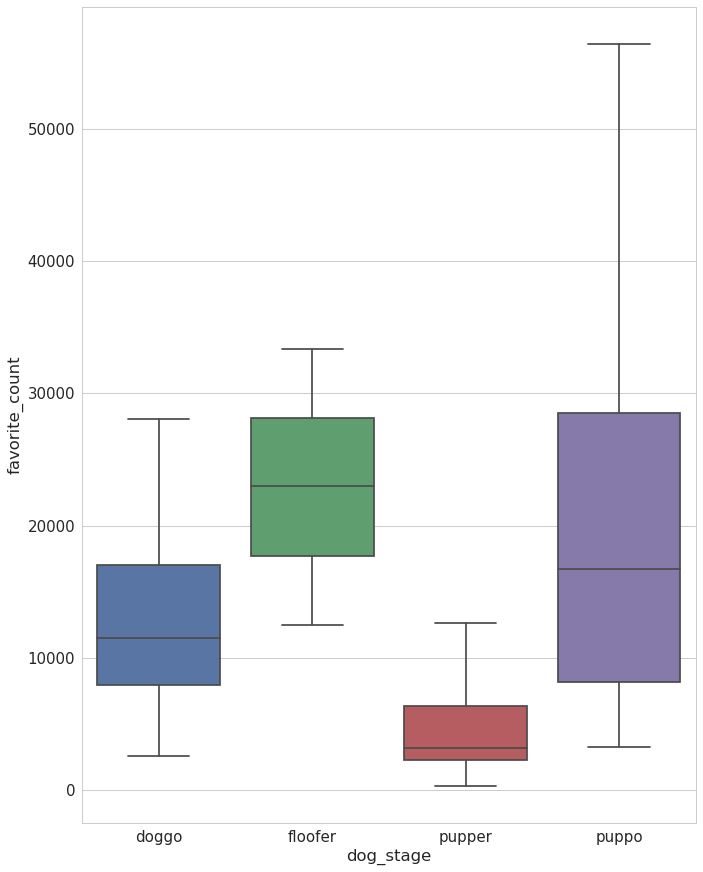

In [772]:
sns.boxplot(data=main_df, x='dog_stage', y='favorite_count', showfliers=False)


### Comment
It is important to notice that the sample of floofer breed is very small (only 3 dogs of this breed). It cannot be considered as a representative sample. Puppo has much larger the maximum favorite count.  On the other hand, pupper has much smaller maximum favorite count

### Visualisation 2

In [773]:
main_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'name', 'date', 'time',
       'dog_stage', 'dog_gender', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [774]:
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

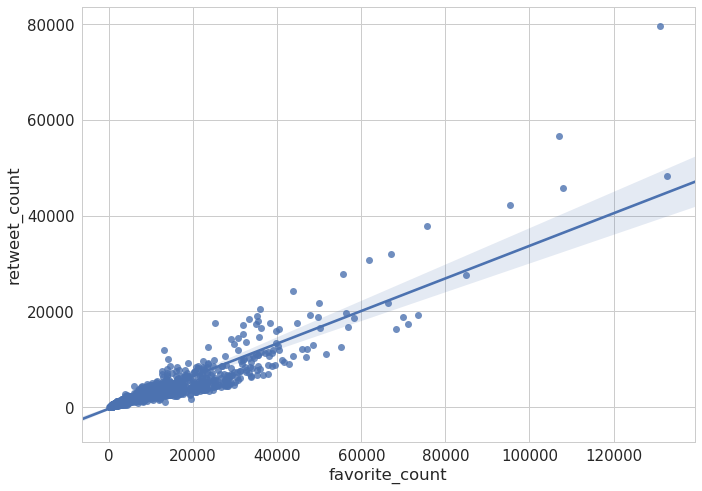

In [775]:
ax = sns.regplot(x="favorite_count", y="retweet_count", data=main_df)

### Comment
On the scatter plot, one can notice strong postive correlation between favorite count and retrieve count, which was expected.

### Visualisation 3

(array([  12.,   19.,   15.,   65.,   50.,   91.,  559.,  381.,  422.,  279.]),
 array([  1. ,   2.3,   3.6,   4.9,   6.2,   7.5,   8.8,  10.1,  11.4,
         12.7,  14. ]),
 <a list of 10 Patch objects>)

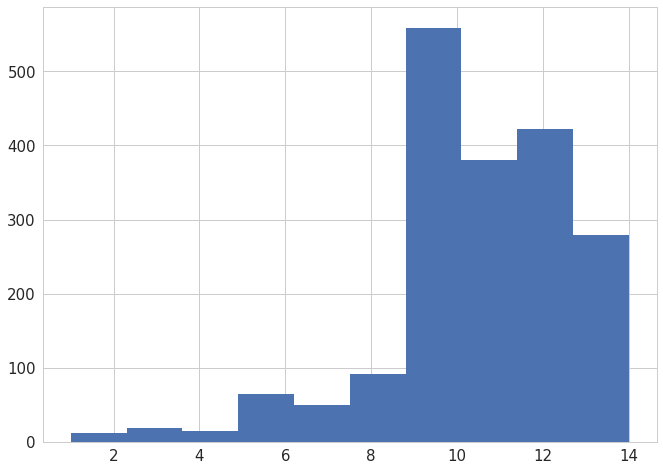

In [776]:
plt.hist( x=main_df.rating_numerator)

### Comment
The distribution of ratings is left-skewed, which means that people evaluated dogs mostly in a positive way.